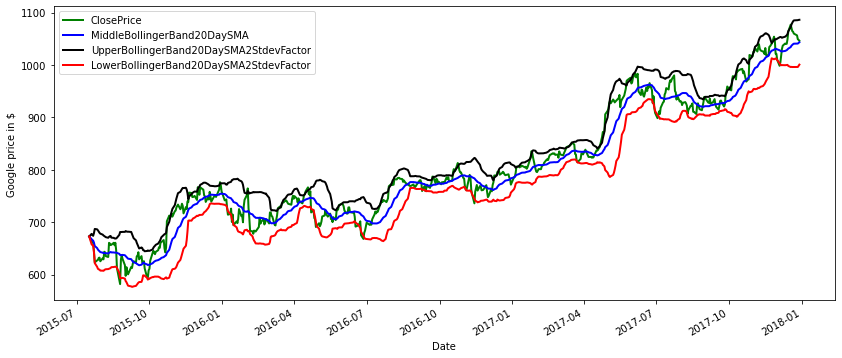

In [7]:
import pandas as pd

from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
    goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
    goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

'''
The Bollinger Band (BBANDS) study created
 by John Bollinger plots upper and lower envelope bands around the
 price of the instrument. The width of the bands is based on the
 standard deviation of the closing prices from a moving average of
 price.
 Middle
 Band = n-period moving average
Upper
 Band = Middle Band + ( y * n-period standard deviation)
Lower Band = Middle Band - ( y *
 n-period standard deviation)
Where:
n = number of periods
y = factor to apply to the standard deviation value, (typical default for y = 2)
Detailed:
Calculate the moving average.
 The formula is:
d = ((P1-MA)^2 + (P2-MA)^2 + ... (Pn-MA)^2)/n
Pn is the price you pay for the nth interval
n is the number of periods you select
Subtract the moving average
 from each of the individual data points used in the moving average
 calculation. This gives you a list of deviations from the average.
 Square each deviation and add them all together. Divide this sum
 by the number of periods you selected.
Take the square root of d. This gives you the standard deviation.
delta = sqrt(d)
Compute the bands by using the following formulas:
Upper Band = MA + delta
Middle Band = MA
Lower Band = MA - delta
 '''
import statistics as stats
import math as math

time_period = 20 # history length for Simple Moving Average for middle band
stdev_factor = 2 # Standard Deviation Scaling factor for the upper and lower bands
history = [] # price history for computing simple moving average
sma_values = [] # moving average of prices for visualization purposes
upper_band = [] # upper band values
lower_band = [] # lower band values

for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # we only want to maintain at most 'time_period' number of price observations
        del (history[0])

    sma = stats.mean(history)
    sma_values.append(sma) # simple moving average or middle band
    variance = 0 # variance is the square of standard deviation
    
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)

    stdev = math.sqrt(variance / len(history)) # use square root to get standard deviation

    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MiddleBollingerBand20DaySMA=pd.Series(sma_values, index=goog_data.index))
goog_data = goog_data.assign(UpperBollingerBand20DaySMA2StdevFactor=pd.Series(upper_band, index=goog_data.index))
goog_data = goog_data.assign(LowerBollingerBand20DaySMA2StdevFactor=pd.Series(lower_band, index=goog_data.index))

close_price = goog_data['ClosePrice']
mband = goog_data['MiddleBollingerBand20DaySMA']
uband = goog_data['UpperBollingerBand20DaySMA2StdevFactor']
lband = goog_data['LowerBollingerBand20DaySMA2StdevFactor']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='black', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()